In [41]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
import pandas as pd
from qbstyles import mpl_style

In [26]:
# change the charting style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# plt.style.use("ggplot")
mpl_style(dark=False)

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
results = pd.read_csv('https://raw.githubusercontent.com/openelections/openelections-data-pa/master/2016/20161108__pa__general_county.csv')

results.head(5)

,county,office,district,party,candidate,votes
0,Adams,President,nan,DEM,Hillary Clinton,14219
1,Adams,President,nan,REP,Donald J. Trump,31423
2,Adams,President,nan,CNST,Darrell L. Castle,191
3,Adams,President,nan,GRN,Jill Stein,405
4,Adams,President,nan,LIB,Gary E. Johnson,1251


In [5]:
president_results = results[results['office'] == 'President']

In [6]:
candidates = president_results['candidate'].unique().tolist()

candidates

['Hillary Clinton',
 'Donald J. Trump',
 'Darrell L. Castle',
 'Jill Stein',
 'Gary E. Johnson']

In [7]:
president_results_table = pd.pivot_table(president_results, index=['county'], columns=['candidate'], values='votes', aggfunc=np.sum)

president_results_table.head(10)

candidate,Darrell L. Castle,Donald J. Trump,Gary E. Johnson,Hillary Clinton,Jill Stein
county,,,,,
Adams,191,31423,1251,14219,405
Allegheny,1818,259480,16102,367617,5097
Armstrong,130,23484,685,7178,141
Beaver,355,48167,2022,32531,496
Bedford,78,19552,260,3645,102
Berks,781,96626,5247,78437,1974
Blair,222,39135,1256,13958,338
Bradford,168,18141,893,6369,137
Bucks,1199,164361,8556,167060,3121


In [8]:
president_results_table['votes'] = president_results_table[candidates].sum(axis=1)
president_results_table['clinton_percent'] = president_results_table['Hillary Clinton']/president_results_table['votes']
president_results_table['trump_percent'] = president_results_table['Donald J. Trump']/president_results_table['votes']

president_results_table['margin'] = president_results_table['trump_percent']-president_results_table['clinton_percent']

president_results_table

candidate,Darrell L. Castle,Donald J. Trump,Gary E. Johnson,Hillary Clinton,Jill Stein,votes,clinton_percent,trump_percent,margin
county,,,,,,,,,
Adams,191,31423,1251,14219,405,47489,0.30,0.66,0.36
Allegheny,1818,259480,16102,367617,5097,650114,0.57,0.40,-0.17
Armstrong,130,23484,685,7178,141,31618,0.23,0.74,0.52
Beaver,355,48167,2022,32531,496,83571,0.39,0.58,0.19
Bedford,78,19552,260,3645,102,23637,0.15,0.83,0.67
Berks,781,96626,5247,78437,1974,183065,0.43,0.53,0.10
Blair,222,39135,1256,13958,338,54909,0.25,0.71,0.46
Bradford,168,18141,893,6369,137,25708,0.25,0.71,0.46
Bucks,1199,164361,8556,167060,3121,344297,0.49,0.48,-0.01


In [44]:
bins = [
    -1,
    -0.9,
    -0.8,
    -0.7,
    -0.6,
    -0.5,
    -0.4,
    -0.3,
    -0.2,
    -0.1,
    0,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1
]

labels = [str(round(pct*100)) + " to " + str(round((pct+0.1)*100)) + "%" for pct in bins[:-1]]

president_results_table['bins'] = pd.cut(president_results_table['margin'],bins=bins,labels=labels)

president_results_table.sort_values(by='votes',ascending=False).head(10)

candidate,Darrell L. Castle,Donald J. Trump,Gary E. Johnson,Hillary Clinton,Jill Stein,votes,clinton_percent,trump_percent,margin,bins
county,,,,,,,,,,
Philadelphia,1064,108748,7115,584025,6679,707631,0.83,0.15,-0.67,-70 to -60%
Allegheny,1818,259480,16102,367617,5097,650114,0.57,0.40,-0.17,-20 to -10%
Montgomery,1236,162731,10934,256082,3704,434687,0.59,0.37,-0.21,-30 to -20%
Bucks,1199,164361,8556,167060,3121,344297,0.49,0.48,-0.01,-10 to 0%
Delaware,985,110667,5992,177402,2588,297634,0.60,0.37,-0.22,-30 to -20%
Chester,827,116114,7930,141682,2247,268800,0.53,0.43,-0.10,-10 to 0%
Lancaster,1529,137914,8555,91093,2021,241112,0.38,0.57,0.19,10 to 20%
York,882,128528,6484,68524,1568,205986,0.33,0.62,0.29,20 to 30%
Berks,781,96626,5247,78437,1974,183065,0.43,0.53,0.10,0 to 10%


In [10]:
president_results_table.groupby('bins')[['votes']].sum()

candidate,votes
bins,
-100 to -90%,0
-90 to -80%,0
-80 to -70%,0
-70 to -60%,707631
-60 to -50%,0
-50 to -40%,0
-40 to -30%,0
-30 to -20%,732321
-20 to -10%,650114


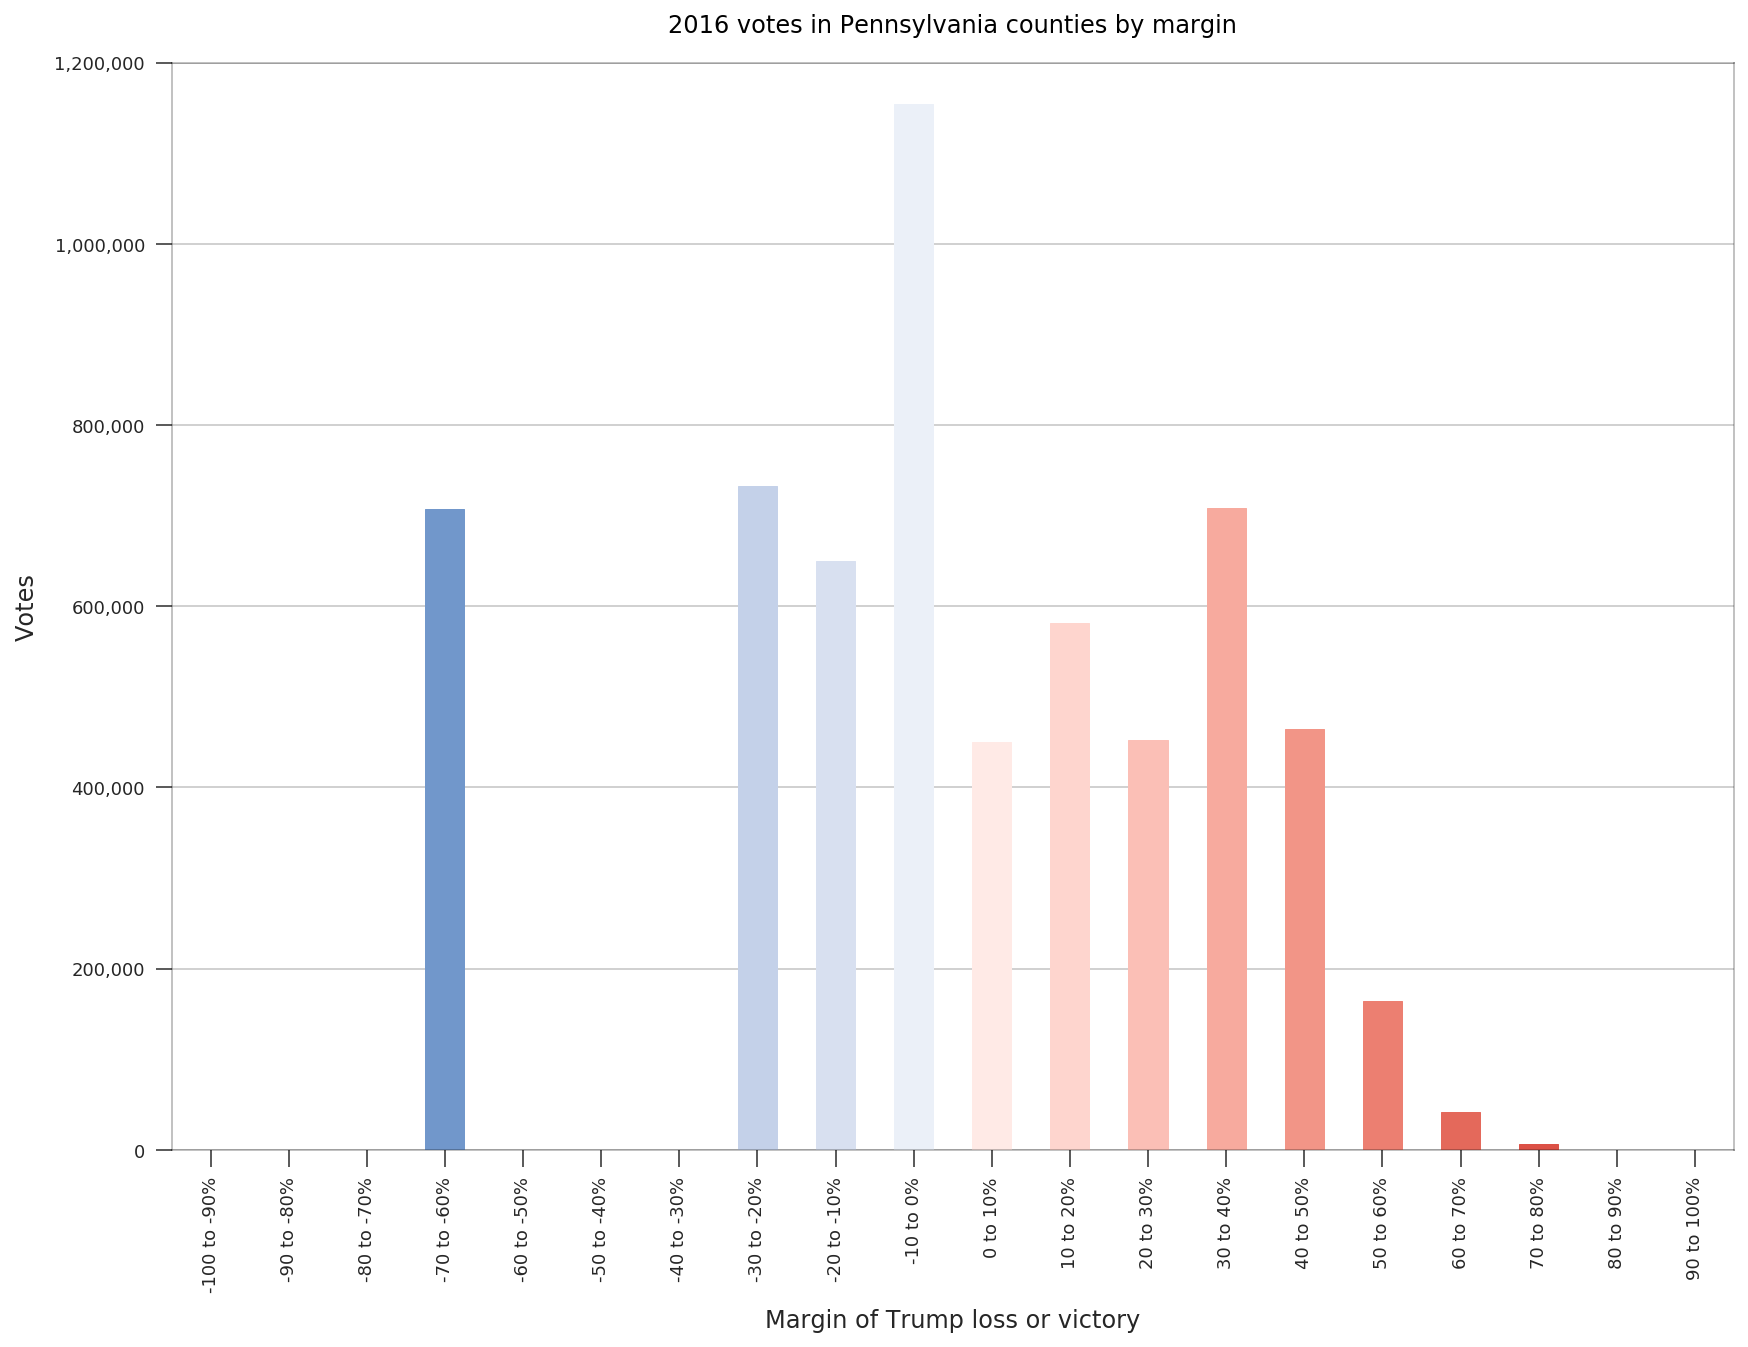

In [62]:
colors = ['#c8011e', '#d23532', '#dc5146', '#e4695b', '#ec7f71', '#f29587', '#f7aa9e', '#fbbfb6', '#fed5ce', '#ffeae6', '#ebf0f8', '#d8e0f0', '#c4d1e9', '#b0c2e1', '#9bb4da', '#87a5d2', '#7197cb', '#598ac3', '#3d7cbc', '#0e6fb4']
ax = president_results_table.groupby('bins')[['votes']].sum().plot.bar(figsize=(14,10),legend=False,alpha=1, stacked=True,color=colors)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title("2016 votes in Pennsylvania counties by margin")
ax.set_xlabel("Margin of Trump loss or victory")
ax.set_ylabel("Votes")

ax.set_facecolor('w')
ax.grid(False,axis='x')

ax.set_axisbelow(True)

ax.set_ylim(0,1200000)

for i, bar in enumerate(ax.patches):
    bar.set_color(colors[20-i-1])

plt.show()